<a href="https://colab.research.google.com/github/trorains/Machine_learning-Group_Task-1/blob/master/CAT_1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install seaborn

In [0]:
%matplotlib inline

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model,metrics
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.datasets import fetch_california_housing 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

Investigating dataset

---

In [0]:
calhousing = fetch_california_housing()
calhousing
# calhousing.DESCR
# calhousing.data
# calhousing.feature_names
# calhousing.data.shape


# X_full, y_full = fetch_california_housing(return_X_y=True)
# X_full


{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geograp

Converting into df_x for features and df_y for target

---

In [0]:
df_x=pd.DataFrame(calhousing.data,columns=calhousing.feature_names)
df_y=pd.DataFrame(calhousing.target)
len(df_x.index)
# df_y

20640

In [0]:
df_x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Check features for missing values

---

In [0]:


missing_value_cols = list(df_x.columns[df_x.isna().any()])
for col in missing_value_cols:
  
  miss_percentage = ((df_x[col].isna().sum())/1460) * 100
  print(col," : ",miss_percentage)

df_x.dropna(axis=1,thresh=0.5*(len(df_x.index)),inplace=True)
df_x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [0]:
missing_val_col = []
missing_value_cols = list(df_x.columns[df_x.isna().any()])
for col in missing_value_cols:
  print(col," : ",df[col].isna().sum())
  missing_val_col.append(col)

# **No empty values at Features!!!!**
---

# **Now we Check target for missing values**
---

In [0]:
df_y.isnull().sum()

0    0
dtype: int64

**No empty values at target either**
---

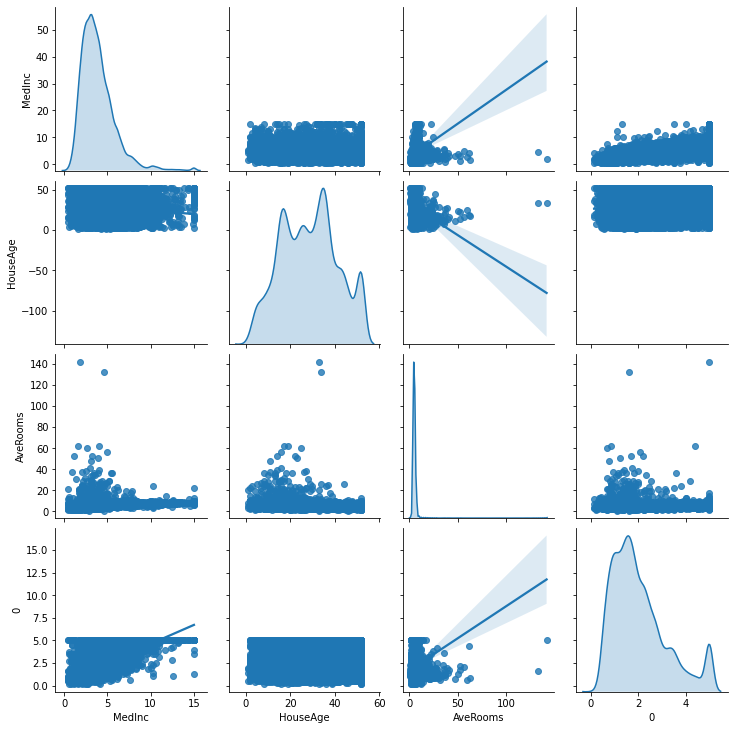

In [0]:
data_trial = pd.concat([df_x['MedInc'],df_x['HouseAge'],df_x['AveRooms'],df_y],axis=1)

sns.pairplot(data_trial,kind='reg',diag_kind='kde')

# Positively Skewed !, Low Frequency on right
---

# **Next we Try :** Distributing data to Gaussian, all features appear numerical

---



In [0]:
X = PowerTransformer().fit_transform(df_x)
y = PowerTransformer().fit_transform(df_y)

# **PCA to remove co-related features(Drawing latent features)**

---

In [0]:
pca_with_varia = PCA(0.9)
pca_with_varia.fit_transform(X)
pca_with_varia.n_components_

6

# **Will choose 2 principle componets to map 3D Figure**

---

In [0]:
pca = PCA(n_components=2)
pc_s = pca.fit_transform(X)
pca_data = pd.DataFrame(pc_s,columns=['PC1','PC2'])
target_data = pd.DataFrame(y)
final_data = pd.concat([pca_data,target_data],axis=1)
final_data

,PC1,PC2,0
0,2.339323,-1.029495,1.715878
1,1.621925,-1.619071,1.281389
2,2.333480,-1.056456,1.247506
3,2.165364,0.052684,1.188835
4,2.335353,0.364186,1.193798
...,...,...,...
20635,1.689388,0.977962,-1.414289
20636,1.970410,-0.406708,-1.433165
20637,1.708682,0.531152,-1.160803
20638,1.981453,0.391902,-1.293200


In [0]:
pca.explained_variance_ratio_

array([0.25800719, 0.21359309])

In [0]:
final_data.describe()

,PC1,PC2,0
count,2.064000e+04,2.064000e+04,2.064000e+04
mean,1.902580e-15,5.671537e-17,1.140173e-15
std,1.436717e+00,1.307221e+00,1.000024e+00
min,-4.079664e+00,-6.037672e+00,-2.997447e+00
25%,-1.211293e+00,-8.470487e-01,-7.379200e-01
50%,-4.100618e-01,3.632690e-02,-1.611421e-02
75%,1.428849e+00,8.638140e-01,7.085479e-01
max,4.793707e+00,8.061784e+00,1.898584e+00


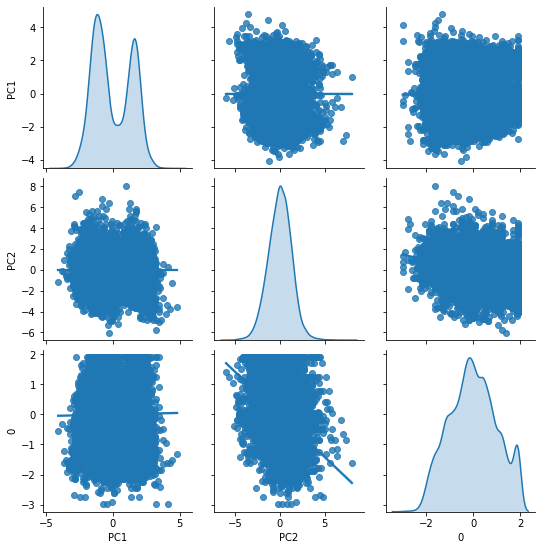

In [0]:
sns.pairplot(final_data,kind='reg', diag_kind='kde')

# **Good! Distribution looks fair**


*   Almost Symmetrical Distribution.
*   Fair to high variance 



---

# **Convert to numpy, split data then do model selection**

---

In [0]:
final_data_array = final_data.to_numpy()

# **Splitting data**

---

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

# **Model selection**

---

In [85]:
results = {}
models = { 'Linear Regression': linear_model.LinearRegression(),
           'Lasso': linear_model.Lasso(),
           'Ridge': linear_model.Ridge(),
           'Xgboost': XGBRegressor(n_estimators=1000, learning_rate=0.05),
           'RandomForest':RandomForestRegressor(random_state =1 ),
          'ElasticRegression': linear_model.ElasticNet(),
            }
for model in models:
    models[model].fit(X_train, y_train)
    accuracy = models[model].score(X_test, y_test)
    results[model] = [accuracy]
pd.DataFrame(results)

[18:02:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


,Linear Regression,Lasso,Ridge,Xgboost,RandomForest,ElasticRegression
0,0.672622,-0.000048,0.672619,0.838011,0.820578,0.14688


In [86]:
kfold = KFold(n_splits=6)
for i in models:
  regressor = models[i]
  c_validated = cross_val_score(regressor,X_train,y_train,cv=kfold)  
  accuracy = c_validated.mean()
  result[i]=[accuracy]
pd.DataFrame(result)

[18:02:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:03:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:03:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

,LinearRegression,Lasso,Ridge,ElasticNet,Linear Regression,Xgboost,RandomForest,ElasticRgression,ElasticRegression
0,0.678604,-0.000687,0.678643,0.144539,0.678643,0.841635,0.822707,0.149747,0.144145


# **Increasing K upto certain value does not improve accuracy since model cannot learn any more even though we are trying to prevent overfitting, information is already generalized well at certain K value beyond which we would just be wasting computational time.**

---

In [88]:
for i in models:
  regressor = models[i]
  if i == 'Lasso':
    lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03],'max_iter':[1000,1100,2000],'tol':[0.001,0.0001,0.000001]}
    grid = GridSearchCV(regressor,param_grid=lasso_params,cv=2,n_jobs=-1)
    results = grid.fit(X_train,y_train)
    accuracy = results.score(X_test,y_test)
  else:    
    c_validated = cross_val_score(regressor,X_train,y_train,cv=kfold)  
    accuracy = c_validated.mean()
  result[i]=[accuracy]
pd.DataFrame(result)

[18:08:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:08:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:09:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:09:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:09:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:09:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

,LinearRegression,Lasso,Ridge,ElasticNet,Linear Regression,Xgboost,RandomForest,ElasticRgression,ElasticRegression
0,0.678604,0.659938,0.678643,0.144539,0.678643,0.841635,0.822707,0.149747,0.144145


In [89]:
for i in models:
  regressor = models[i]
  if i == 'Lasso':
    random = RandomizedSearchCV(regressor,param_distributions=lasso_params,cv=3,n_jobs=-1)
    results = random.fit(X_train,y_train)
    print(results.best_score_)
    print("Best Params are ", results.best_params_)
    accuracy = results.score(X_test,y_test)
  else:    
    c_validated = cross_val_score(regressor,X_train,y_train,cv=kfold)  
    accuracy = c_validated.mean()
  result[i]=[accuracy]
pd.DataFrame(result)

0.6636483137811867
Best Params are  {'tol': 0.0001, 'max_iter': 1000, 'alpha': 0.02}
[18:10:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:10:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:10:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:10:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:10:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:11:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

,LinearRegression,Lasso,Ridge,ElasticNet,Linear Regression,Xgboost,RandomForest,ElasticRgression,ElasticRegression
0,0.678604,0.659905,0.678643,0.144539,0.678643,0.841635,0.822707,0.149747,0.144145


In [0]:
min_val = np.min(final_data_array, axis=0)
max_val = np.max(final_data_array, axis=0)
X,Y = np.meshgrid(np.linspace(min_val[0], max_val[0], 20), np.linspace(min_val[1], max_val[1], 20))

In [91]:
regressor=LassoCV()
regressor.fit(X_train,y_train)
w_1 = regressor.coef_[0]
w_2 = regressor.coef_[1]
b = regressor.intercept_
Z = w_1*X + w_2*Y + b


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [92]:
regressor.score(X_test,y_test)

0.6726933288938879

Text(0.5, 0.92, 'Plane of Best Fit')

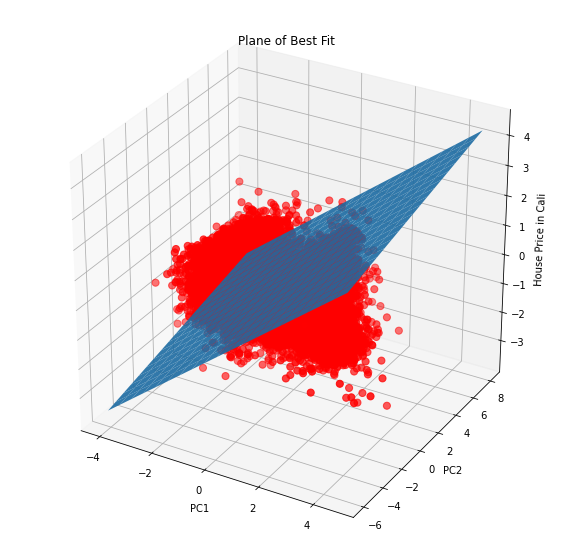

In [93]:
fig1 =  plt.figure(figsize=(10, 10))
ax = fig1.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.9)
ax.scatter(final_data_array[:,0], final_data_array[:,1], final_data_array[:,2], c='r', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel('House Price in Cali')
ax.set_title("Plane of Best Fit")